#**Visualizing Naive Bayes**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import confidence_ellipse # Function to add confidence ellipses to charts

 ## Calculate the likelihoods for each tweet

For each tweet, we have calculated the likelihood of the tweet to be positive and the likelihood to be negative. We have calculated in different columns the numerator and denominator of the likelihood ratio introduced previously.  

$$log \frac{P(tweet|pos)}{P(tweet|neg)} = log(P(tweet|pos)) - log(P(tweet|neg)) $$
$$positive = log(P(tweet|pos)) = \sum_{i=0}^{n}{log P(W_i|pos)}$$
$$negative = log(P(tweet|neg)) = \sum_{i=0}^{n}{log P(W_i|neg)}$$

In [2]:
data = pd.read_csv('bayes_features.csv')
data.head(5)

,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0
3,-10.055885,-18.589057,1.0
4,-125.749270,-138.334845,1.0


Text(0, 0.5, 'Negative')

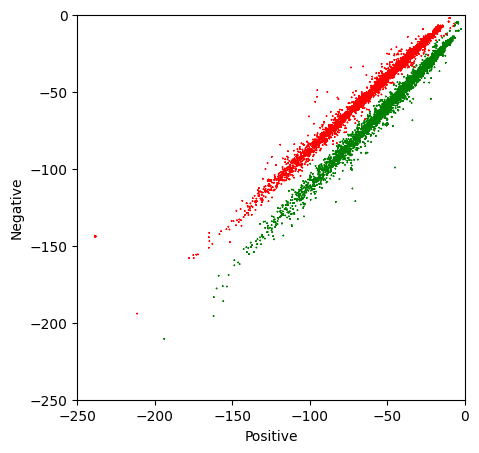

In [5]:
# Plot the samples using columns 1 and 2 of the matrix

fig, ax = plt.subplots(figsize = (5, 5))

colors = ['red', 'green']

# Color base on sentiment
ax.scatter(data.positive, data.negative, c=[colors[int(k)] for k in data.sentiment], s = 0.1, marker = '*') # Plot a dot for each tweet

# Custom limits for this chart
plt.xlim(-250,0)
plt.ylim(-250,0)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

##**Using Confidence Ellipses to interpret Naïve Bayes**

we will use the [confidence ellipse]( https://matplotlib.org/3.1.1/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py) to give us an idea of what the Naïve Bayes model see.

A confidence ellipse is a way to visualize a 2D random variable. It is a better way than plotting the points over a cartesian plane because, with big datasets, the points can overlap badly and hide the real distribution of the data. Confidence ellipses summarize the information of the dataset with only four parameters:

* Center: It is the numerical mean of the attributes
* Height and width: Related with the variance of each attribute. The user must specify the desired amount of standard deviations used to plot the ellipse.
* Angle: Related with the covariance among attributes.

The parameter __n_std__ stands for the number of standard deviations bounded by the ellipse. Remember that for normal random distributions:

* About 68% of the area under the curve falls within 1 standard deviation around the mean.
* About 95% of the area under the curve falls within 2 standard deviations around the mean.
* About 99.7% of the area under the curve falls within 3 standard deviations around the mean.

<img src=./images/std.jpg width="400" >


In the next chart, we will plot the data and its corresponding confidence ellipses using 2 std and 3 std.

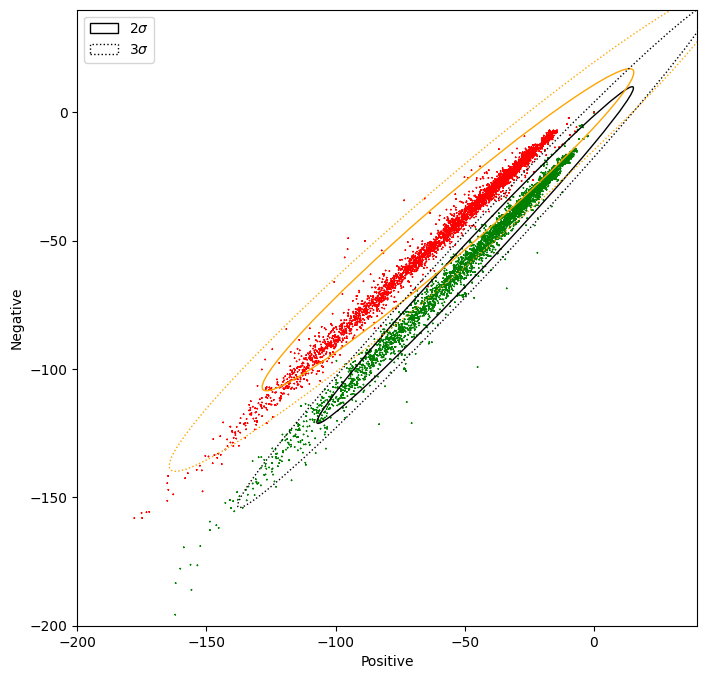

In [9]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

# Color base on sentiment

ax.scatter(data.positive, data.negative, c=[colors[int(k)] for k in data.sentiment], s = 0.1, marker='*')  # Plot a dot for tweet

# Custom limits for this chart
plt.xlim(-200,40)
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

data_pos = data[data.sentiment == 1] # Filter only the positive samples
data_neg = data[data.sentiment == 0] # Filter only the negative samples

# Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std = 2, edgecolor = 'black', label = r'$2\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std = 2, edgecolor = 'orange')

# Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend()

plt.show()

In [10]:
data2 = data.copy() # Copy the whole data frame

# The following 2 lines only modify the entries in the data frame where sentiment == 1
data2.negative[data.sentiment == 1] =  data2.negative * 1.5 + 50 # Modify the negative attribute
data2.positive[data.sentiment == 1] =  data2.positive / 1.5 - 50 # Modify the positive attribute

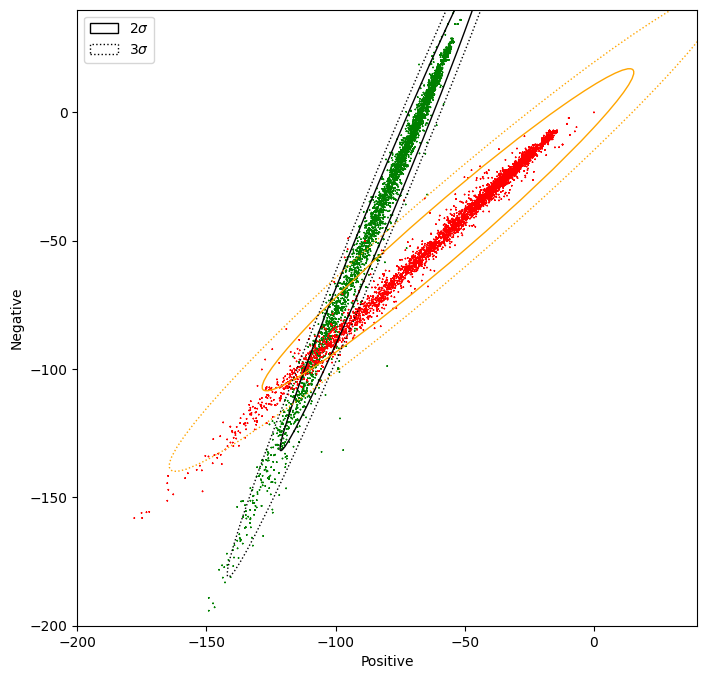

In [11]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green'] # Define a color palete

# Color base on sentiment

#data.negative[data.sentiment == 1] =  data.negative * 2

ax.scatter(data2.positive, data2.negative, c=[colors[int(k)] for k in data2.sentiment], s = 0.1, marker='*')  # Plot a dot for tweet
# Custom limits for this chart
plt.xlim(-200,40)
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

data_pos = data2[data2.sentiment == 1] # Filter only the positive samples
data_neg = data[data2.sentiment == 0] # Filter only the negative samples

# Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')

# Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend()

plt.show()